In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

plt.style.use("ggplot")

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [2]:
# Loading/Reading in the Data
df = pd.read_csv("C:/Users/Win10/Downloads/BTC-USD.csv")

In [17]:
df.head()

,Close
Date,
2020-06-18,0.006729
2020-06-19,0.004455
2020-06-20,0.005269
2020-06-21,0.004742
2020-06-22,0.011079


In [3]:
# Data Preprocessing
### Setting the datetime index as the date, only selecting the 'Close' column,
### then only the last 1000 closing prices.
df = df.set_index("Date")[['Close']].tail(1000)
df = df.set_index(pd.to_datetime(df.index))

# Normalizing/Scaling the Data -- MinMaxScaler = Max and Min is scaled to 1, 0
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [4]:
# Can check training progress/results of our Neural Network
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12, 4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [5]:
#X and y are the input and output variables of neural network
#Input: # of periods to look back -> used to figure out the patterns and sequences that leads to output periods
#Output: # of periods ahead
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []

    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out

        if out_end > len(seq):
            break

        seq_x, seq_y = seq[i:end], seq[end:out_end]

        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

In [6]:
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Create a specified number of hidden layers for an RNN
    Optional: Adds regularization option, dropout layer to prevent potential overfitting if necessary
    """

    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1, n_layers + 1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

In [7]:
# Implement the split_sequence() to the BTC-USD.csv data
# How many periods looking back to train
n_per_in  = 30  # look back 30 days

# How many periods ahead to predict
n_per_out = 10  # to predict next 10 days

# Features (in this case it's 1 because there is only one feature: price)
n_features = 1

# Splitting the data into appropriate sequences
X, y = split_sequence(list(df.Close), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [8]:
# Instantiating the model
model = Sequential()

# Activation
activ = "softsign"

# Input layer
model.add(LSTM(30, activation=activ, return_sequences=True, input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=6, n_nodes=12, activation=activ)

# Final Hidden layer
model.add(LSTM(10, activation=activ))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 30)            3840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 12)            2064      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 12)            1200      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 12)            1200      
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 12)            1200      
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 12)            1200      
_________________________________________________________________
lstm_6 (LSTM)                (None, 30, 12)            1

In [16]:
model.compile(optimizer = 'Adam', loss = 'mae', metrics = ['accuracy'])
res = model.fit(X, y, epochs=800, batch_size=32, validation_split=0.1)

Epoch 1/800
10/10 [==============================] - 9s 152ms/step - loss: nan - accuracy: 0.0920 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/800
10/10 [==============================] - 0s 34ms/step - loss: nan - accuracy: 0.0968 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/800
10/10 [==============================] - 0s 34ms/step - loss: nan - accuracy: 0.1161 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/800
10/10 [==============================] - 0s 33ms/step - loss: nan - accuracy: 0.1137 - val_loss: nan - val_accuracy: 0.3333
Epoch 5/800
10/10 [==============================] - 0s 34ms/step - loss: nan - accuracy: 0.1157 - val_loss: nan - val_accuracy: 0.3333
Epoch 6/800
10/10 [==============================] - 0s 33ms/step - loss: nan - accuracy: 0.1197 - val_loss: nan - val_accuracy: 0.3333
Epoch 7/800
10/10 [==============================] - 0s 35ms/step - loss: nan - accuracy: 0.1083 - val_loss: nan - val_accuracy: 0.3333
Epoch 8/800
10/10 [============================

Epoch 61/800
10/10 [==============================] - 0s 33ms/step - loss: nan - accuracy: 0.0820 - val_loss: nan - val_accuracy: 0.3333
Epoch 62/800
10/10 [==============================] - 0s 33ms/step - loss: nan - accuracy: 0.1116 - val_loss: nan - val_accuracy: 0.3333
Epoch 63/800
10/10 [==============================] - 0s 33ms/step - loss: nan - accuracy: 0.0940 - val_loss: nan - val_accuracy: 0.3333
Epoch 64/800
10/10 [==============================] - 0s 34ms/step - loss: nan - accuracy: 0.1143 - val_loss: nan - val_accuracy: 0.3333
Epoch 65/800
10/10 [==============================] - 0s 34ms/step - loss: nan - accuracy: 0.1005 - val_loss: nan - val_accuracy: 0.3333
Epoch 66/800
10/10 [==============================] - 0s 33ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.3333
Epoch 67/800
10/10 [==============================] - 0s 33ms/step - loss: nan - accuracy: 0.0935 - val_loss: nan - val_accuracy: 0.3333
Epoch 68/800
10/10 [=====================

KeyboardInterrupt: 

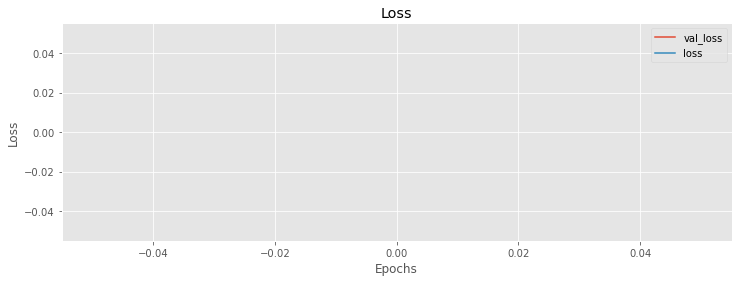

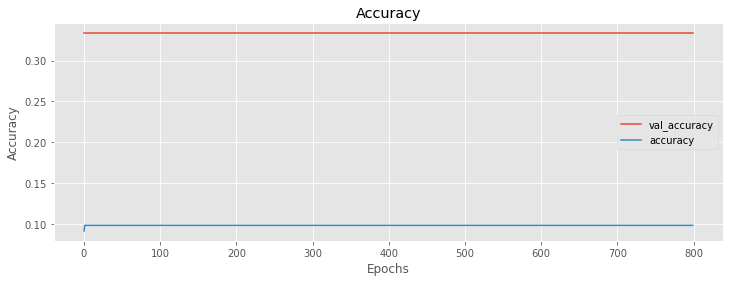

In [15]:
visualize_training_results(res)

## Validating our Neural Network

Predicted Prices:
 [[9055.580848113912], [9048.275990968381], [9065.040692021128], [9046.77466368098], [9032.215046913174], [9023.99358347685], [9005.844194710875], [9019.687000136571], [9047.472586124286], [9041.039080921599]]

Actual Prices:
 [[37345.121094], [36702.597656], [37334.398438], [35552.515625], [39097.859375], [40218.476563], [40406.269531], [38347.0625], [nan], [38036.703125]]


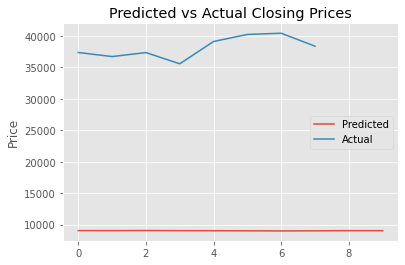

In [11]:
# Getting predictions by predicting from the last available X variable
yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming values back to their normal prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Getting the actual values from the last available y variable which correspond to its respective X variable
actual = scaler.inverse_transform(y[-1].reshape(-1,1))

# Printing and plotting those predictions
print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

# Printing and plotting the actual values
print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTC_validation.png")
plt.show()


## Forecasting/Predicting with our RNN

            Close
2021-06-18    NaN
2021-06-19    NaN
2021-06-20    NaN
2021-06-21    NaN
2021-06-22    NaN
2021-06-23    NaN
2021-06-24    NaN
2021-06-25    NaN
2021-06-26    NaN
2021-06-27    NaN


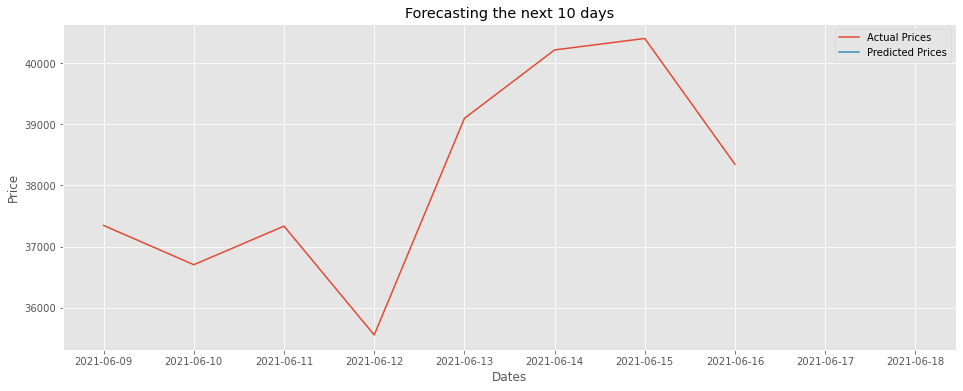

In [12]:
# Predicting off of y because it contains the most recent dates
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming the predicted values back to their original prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat), freq="D"), columns=df.columns)

# Printing the predicted prices
print(preds)

# Number of periods back to visualize the actual values
pers = 10

# Transforming the actual values to their original price
actual = pd.DataFrame(scaler.inverse_transform(df[["Close"]].tail(pers)), index=df.Close.tail(pers).index, columns=df.columns).append(preds.head(1))

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.savefig("BTC_predictions.png")
plt.show()